# Explore performance at state level

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from helper import state_df, moving_avg, moving_avg_df, Comb_neighbor, plot_multiple

df = pd.read_csv('./United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
# convert 'submission_date' data type to datetime 
df['submission_date'] = pd.to_datetime(df['submission_date'], format='%m/%d/%Y')
# select time, state, total cases, new cases, total death, new death as covid
covid=df[['submission_date','state','tot_cases', 'new_case', 'tot_death', 'new_death']]
#check if covid has missing value
print(covid.isnull().sum())


submission_date    0
state              0
tot_cases          0
new_case           0
tot_death          0
new_death          0
dtype: int64


In [2]:
#cases and death data in a state level in different regions
diff_regions=['SC','CA','NY','TX','FL','WY']
covid_sc=state_df(covid, 'SC')
covid_ca=state_df(covid, 'CA')
covid_ny=state_df(covid, 'NY')
covid_tx=state_df(covid, 'TX')
covid_fl=state_df(covid, 'FL')
covid_wy=state_df(covid, 'WY')

In [3]:
#neighbor states 
neighbor_states=['SC','NC','GA','TN','KY','VA','WV']
covid_nc=state_df(covid, 'NC')
covid_ga=state_df(covid, 'GA')
covid_tn=state_df(covid, 'TN')
covid_ky=state_df(covid, 'KY')
covid_va=state_df(covid, 'VA')
covid_wv=state_df(covid, 'WV')


In [4]:
#create a list of dataframe of different states(neighbor of SC or a list of states from different regions)

region_list, neighbor_list=[],[]
for item in neighbor_states:
    neighbor_list.append(state_df(covid,item))

for item in diff_regions:
    region_list.append(state_df(covid,item))

In [5]:
#a list of covid-related variables
variables=list(covid_sc.columns.values)
#adjust the date as the days relative to the start (01/22/2020) for plot
days_since_begin = np.array([i for i in range(len(covid_sc.index.values))]).reshape(-1,1)
days_since_begin.shape

(439, 1)

In [6]:
#dataframe of a covid-related variable for all the states in diff_region  
region_tot_cases=Comb_neighbor(region_list, 'tot_cases', diff_regions)
region_new_case=Comb_neighbor(region_list,'new_case', diff_regions)
region_tot_death=Comb_neighbor(region_list,'tot_death', diff_regions)
region_new_death=Comb_neighbor(region_list,'new_death', diff_regions)

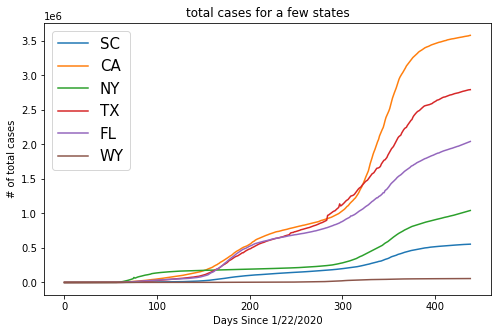

In [7]:
#plot the trend of all states in the list in a single plot
plot_multiple(days_since_begin, region_tot_cases, 'total cases')
plt.legend(diff_regions, prop={'size':15})

In [8]:
#dataframe of a covid-related variable for all the states in neighbor_states 
neighbor_tot_cases=Comb_neighbor(neighbor_list, 'tot_cases', neighbor_states)
neighbor_new_case=Comb_neighbor(neighbor_list,'new_case', neighbor_states)
neighbor_tot_death=Comb_neighbor(neighbor_list,'tot_death', neighbor_states)
neighbor_new_death=Comb_neighbor(neighbor_list,'new_death', neighbor_states)


In [9]:
#monthly moving average of new cases of the states in neighbor list
window=30
avg_new_case=moving_avg_df(neighbor_new_case, window)
#avg_new_cases=moving_avg(neighbor.new_case.values, window)

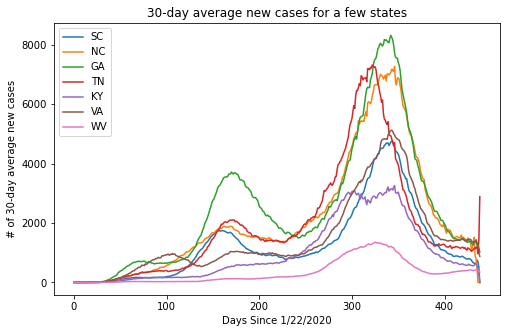

In [10]:
plot_multiple(days_since_begin, avg_new_case, '30-day average new cases')
plt.legend(neighbor_states, loc=2, prop={'size':10})

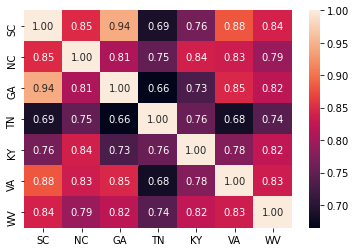

In [11]:
#correlations between SC and its neighbors
sns.heatmap(neighbor_new_case.corr(), annot=True, fmt=".2f");

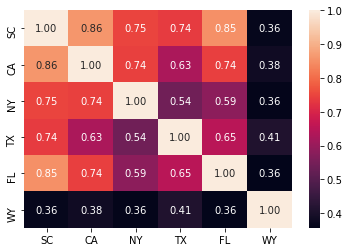

In [12]:
#correlations between SC and states in different region
sns.heatmap(region_new_case.corr(), annot=True, fmt=".2f");

## Relationship between SC and its neighbors

In [13]:
#Linear regression 
#X is all the data from SC's neighbor, y is the data from SC.
#dump the last 30+ data because the moving average does not reflect correct time information
X = avg_new_case.drop(['SC'], axis=1)[:400] 
y = avg_new_case['SC'][:400]
split=np.int64(400*0.9) #use the time data before split as train set and after as test set
X_train, y_train=X[:split], y[:split]
X_test, y_test=X[split:], y[split:]
lm_model = LinearRegression() 
lm_model.fit(X_train, y_train) 
        
y_test_preds = lm_model.predict(X_test)

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.9746756733403815
11611.663270961548


In [14]:
#monthly moving average of new cases of the states in different region
window=30
avg_new_case1=moving_avg_df(region_new_case, window)

In [15]:
#Linear regression of SC and states in different regions
X = avg_new_case1.drop(['SC'], axis=1)[:400]
y = avg_new_case1['SC'][:400]
split=np.int64(400*0.9)
X_train, y_train=X[:split], y[:split]
X_test, y_test=X[split:], y[split:]
lm_model = LinearRegression() 
lm_model.fit(X_train, y_train) 
        
y_test_preds = lm_model.predict(X_test)

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.9340419309163391
30242.97145177586
